# CHAPTER 1: SOFTWARE AND PACKAGES SETUP

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy

# CHAPTER 2: BASIC OPERATIONS ON IMAGES

In [3]:
img=cv2.imread("b.jpg",0)

In [4]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [3]:
def wind(image):    
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
wind(img)

In [7]:
img1=cv2.imread("b.jpg",1)
wind(img1)

In [8]:
img2=deepcopy(img1)
circle=cv2.circle(img2,(300,250),130,(55,33,59),10)
wind(circle)

In [8]:
img4=cv2.imread("b.jpg",1)
wind(img4)

In [ ]:
img3=deepcopy(img4)
def clickToCircle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img3,(x,y),50,(255,33,59),5)
cv2.namedWindow('DIFFERENCES',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('DIFFERENCES',clickToCircle)

while True:
    cv2.imshow('DIFFERENCES',img3)
    a=cv2.waitKey(1)
    print(a)
    if a==27:
        break
a=a+1
cv2.destroyAllWindows() 

In [ ]:
#splitting channels, map algebera

In [6]:
b,g,r=cv2.split(img4)

In [7]:
img4


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
wind(img4)

In [9]:
wind(r)

In [11]:
img5=cv2.merge((b,g,r))
wind(img5)

In [ ]:
#resizing, cropping, exporting images

In [9]:
imres=cv2.resize(img4,dsize=None,fx=0.5,fy=.5,interpolation=cv2.INTER_CUBIC)


In [10]:
cv2.imshow('window',imres)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
cropped=imres[223:255, 250:350]

In [13]:
wind(cropped)

In [15]:
cv2.imwrite('cropped_image.jpg',cropped)

True

# CHAPTER 3: GEOMETRIC OPERATIONS IN IMAGES

In [3]:
#image gradients

In [35]:
img=cv2.imread("land.png",0)
wind(img)

In [6]:
sobelx=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)#x filter

In [10]:
wind(sobelx)

In [8]:
sobely=cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)#y filter

In [34]:
wind(sobely)

In [13]:
laplacian=cv2.Laplacian(img,cv2.CV_8U)

In [14]:
wind(laplacian)

In [15]:
# edge and feature detection

In [16]:
canny= cv2.Canny(img,100,200)

In [17]:
wind(canny)

In [18]:
imgcolor= cv2.imread('land.png',1)
wind(imgcolor)

In [20]:
cannycoloredges = cv2.Canny(imgcolor,300,400)#automatically turns image into black and white image
wind(cannycolor)

In [21]:
tennis=cv2.imread('tennins.jpg',1)

In [33]:
wind(tennis)
edges = cv2.Canny(tennis,300,400)

In [24]:
lines=cv2.HoughLines(edges,1,np.pi/180,200)

In [25]:
lines

array([[[ 37.       ,   1.5707964]],

       [[329.       ,   1.5707964]],

       [[ 43.       ,   1.5707964]],

       [[323.       ,   1.5707964]],

       [[285.       ,   1.5707964]],

       [[ 80.       ,   1.5707964]],

       [[ 85.       ,   1.5707964]],

       [[280.       ,   1.5707964]],

       [[ 35.       ,   0.       ]],

       [[576.       ,   0.       ]],

       [[180.       ,   1.5707964]],

       [[185.       ,   1.5707964]],

       [[303.       ,   0.       ]],

       [[308.       ,   0.       ]],

       [[571.       ,   0.       ]],

       [[ 40.       ,   0.       ]]], dtype=float32)

In [30]:
for iterator in lines:
    rho=iterator[0,0]
    theta=iterator[0,1]
    a=np.cos(theta)
    b=np.sin(theta)
    x0=a*rho
    y0=b*rho
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv2.line(tennis,(x1,y1),(x2,y2),(0,0,255),2)

In [32]:
wind(tennis)

In [36]:
#geocomputation application

In [37]:
imgN1=cv2.imread("double.png",1)
wind(imgN1)

In [38]:
diffs=np.array([[538,109],[1203,739],[758,137],[1240,467]])


In [39]:
def euclid(x1,x2,y1,y2):
    return int(np.sqrt((x1-x2)**2+(y1-y2)**2))

In [ ]:
imgN=deepcopy(imgN1)
def click2circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:
        for diff in diffs:
            if euclid(x,diff[0],y,diff[1])<15:
                cv2.circle(imgN,(x,y),50,(255,0,0),4)

cv2.namedWindow("differences",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("differences", click2circle)

while True:
    cv2.imshow("differences",imgN)
    a=cv2.waitKey(1)
    if a==27:
        break
cv2.destroyAllWindows()

# CHAPTER 4: RADIOMETRIC OPERATIONS ON IMAGE

In [1]:
#image colorspace and thresholding

In [4]:
imgN1=cv2.imread('tennins.jpg',1)

In [5]:
hsv=cv2.cvtColor(imgN1,cv2.COLOR_BGR2HSV)

In [6]:
wind(hsv)

In [7]:
gray=cv2.cvtColor(imgN1,cv2.COLOR_BGR2GRAY)

In [8]:
wind(gray)

In [9]:
r,t=cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

In [10]:
r


100.0

In [11]:
t

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
wind(t)

In [13]:
# Image histogram

In [14]:
lena=cv2.imread("lena.jpg",0)

In [15]:
wind(lena)

In [16]:
hist=cv2.calcHist([lena],[0],None,[256],[0,256])

In [17]:
xaxis=np.arange(256).reshape(256,1)

In [18]:
histogram=np.hstack((xaxis,hist)).astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

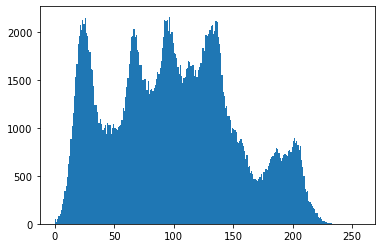

In [19]:
plt.hist(lena.flatten(),256,[0,256])
plt.show

In [20]:
equ=cv2.equalizeHist(lena)

In [21]:
wind(equ)

In [22]:
res=np.hstack((lena,equ))

In [23]:
wind(res)

In [24]:
#Convolution based operations

In [26]:
blur=cv2.blur(lena,(5,5))
wind(blur)

In [27]:
blurG=cv2.GaussianBlur(lena,(13,13),0)
wind(blurG)

In [28]:
res=np.hstack((lena,blurG))
wind(res)

In [29]:
# k-means classification

In [32]:
img=cv2.imread("im0.png",1)
#wind(img)

In [33]:
imgCL=np.float32(img.reshape((-1,3)))

In [35]:
imgCL=np.float32(img.reshape((-1,3)))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
K=4
ret,lab,center=cv2.kmeans(imgCL,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
res=center[lab.flatten()]
res2=res.reshape((img.shape))
wind(res2)

In [36]:
lab

array([[0],
       [0],
       [0],
       ...,
       [3],
       [3],
       [3]], dtype=int32)

In [37]:
center

array([[ 94, 105, 127],
       [ 48,  54, 217],
       [ 31,  39,  63],
       [166, 174, 189]], dtype=uint8)

In [38]:
ret

10629977537.329216